In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import shutil
import random


dtype_dict = {
    'iddx_5': str,  
    'mel_mitotic_index': str,
}

image_folder_path = '/kaggle/input/skin-cancer-detection-dataset/train-image/image'
csv_file_path = '/kaggle/input/skin-cancer-detection-dataset/train-metadata.csv'

# Load CSV data
meta_data = pd.read_csv(csv_file_path, low_memory=False)
# meta_data['iddx_3'] = meta_data['iddx_3'].astype(str)  # Convert to string
# meta_data['iddx_4'] = meta_data['iddx_4'].astype(str)

#Sampling first 5 rows
meta_data[:5]

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [2]:
#Speciying X and y sets
X = meta_data.drop('target', axis = 1)
y = meta_data['target']

# DATA LOADING AND VISUALIZATION

In [3]:
# Function to load a sample of images
def load_image_sample(image_folder, sample_size=100):
    
    #listing all images in target folder
    all_images = os.listdir(image_folder)
    
    #choose sample_size no. of images randomly while not replacing them again
    sample_images = np.random.choice(all_images, sample_size, replace=False)
    
    #np array to store the images
    images = []
    
        
    for img_name in sample_images:
        #making complete path of images including path of dir and the img
        img_path = os.path.join(image_folder, img_name)
        img = Image.open(img_path)
        
        #change the image from jpg to np array
        images.append(np.array(img))
    return images, sample_images


image_folder = '/kaggle/input/skin-cancer-detection-dataset/train-image/image'
images, sampled_image_names = load_image_sample(image_folder, sample_size=100)


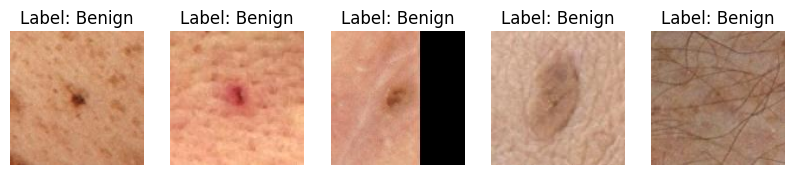

In [4]:
#function to display the loaded images
def visualize_random_images(images, meta_data, sample_image_names, num_images=5):
    plt.figure(figsize=(10, 10))
    
    # giving appropriate label
    label_mapping = {0: 'Benign', 1: 'Malignant'} 
    
    for i in range(num_images):
        #makes a subplot of 1 row having num_images no. of images
        plt.subplot(1, num_images, i + 1)
        
        #randomly select any image
        random_idx = np.random.randint(0, len(images))
        plt.imshow(images[random_idx])
        
        # Remove file extension
        img_name = os.path.splitext(sample_image_names[random_idx])[0]  
        img_label = meta_data[meta_data['isic_id'] == img_name]['target'].values[0]
        
        numerical_label = meta_data[meta_data['isic_id'] == img_name]['target'].values[0]
        img_label = label_mapping.get(numerical_label)
        
        plt.title(f"Label: {img_label}")
        plt.axis('off')
        
    plt.show()

visualize_random_images(images, meta_data, sampled_image_names)


Class distribution:
target
0    400666
1       393
Name: count, dtype: int64


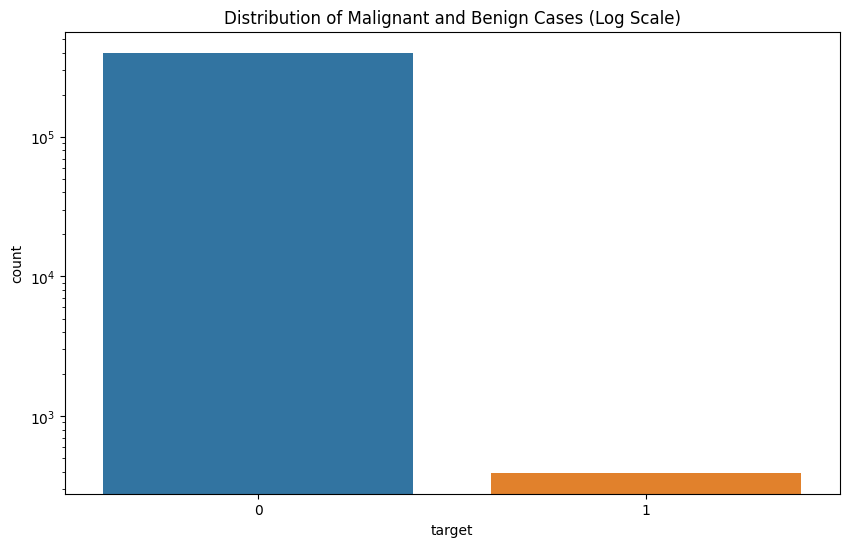

In [5]:
# Count the occurrences of each class
class_counts = meta_data['target'].value_counts()

print("Class distribution:")
print(class_counts)

# Create a countplot with log scale on the y-axis bcz of less no. of malignant cases
plt.figure(figsize=(10, 6))
sns.countplot(data=meta_data, x='target')
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Distribution of Malignant and Benign Cases (Log Scale)')
plt.show()

In [6]:
import numpy as np

def get_image_dimensions(images):
    dimensions = []
    
    for img in images:
            # Get dimensions (height, width, channels) of the image
            if len(img.shape) >= 2:
                height, width = img.shape[:2]  # Handle grayscale and RGB images
                dimensions.append((width, height))
            else:
                print("Warning: Image array does not have expected shape:", img.shape)
    
    return np.array(dimensions)

image_dimensions = get_image_dimensions(images)

# Calculate basic statistics
mean_dimensions = np.mean(image_dimensions, axis=0)
std_dimensions = np.std(image_dimensions, axis=0)

print(f"Mean dimensions (width, height): {mean_dimensions}")
print(f"Standard deviation of dimensions (width, height): {std_dimensions}")


Mean dimensions (width, height): [132.42 132.42]
Standard deviation of dimensions (width, height): [16.88856418 16.88856418]


Basic statistics for patient age:
count    398261.000000
mean         58.012986
std          13.596165
min           5.000000
25%          50.000000
50%          60.000000
75%          70.000000
max          85.000000
Name: age_approx, dtype: float64
Distribution of lesion locations:
tbp_lv_location
Torso Back Top Third       71112
Torso Front Top Half       63350
Torso Back Middle Third    46185
Left Leg - Lower           27428
Right Leg - Lower          25208
Torso Front Bottom Half    24360
Left Leg - Upper           23673
Right Leg - Upper          23034
Right Arm - Upper          22972
Left Arm - Upper           22816
Head & Neck                12046
Left Arm - Lower           11939
Right Arm - Lower          10636
Unknown                     5756
Torso Back Bottom Third     4596
Left Leg                    1974
Right Leg                   1711
Left Arm                    1593
Right Arm                    601
Torso Front                   60
Torso Back                     9
Name: 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


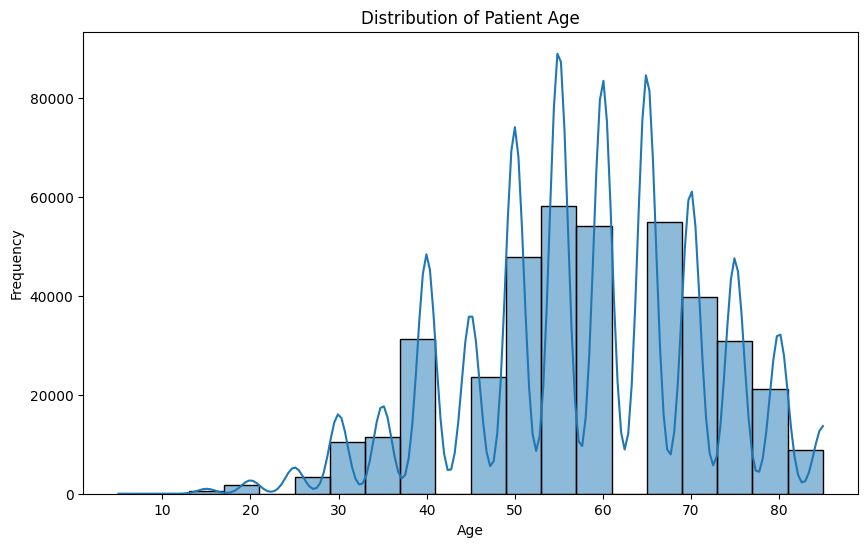

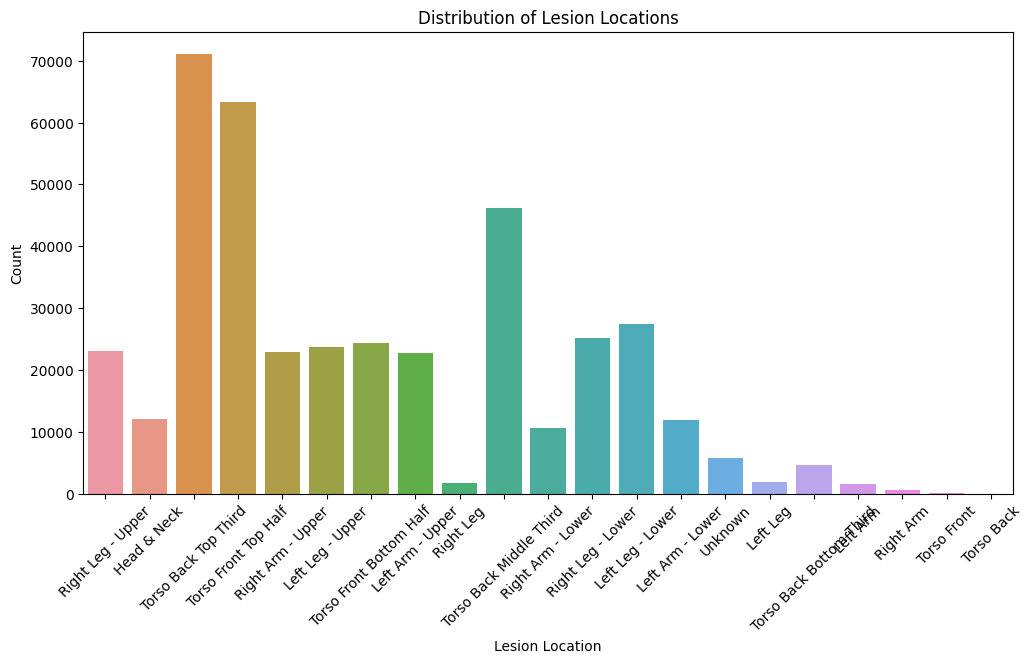

In [7]:
# Basic statistics
print("Basic statistics for patient age:")
print(meta_data['age_approx'].describe())  # Assuming 'age' is the column name for patient age

# Distribution of lesion location
print("Distribution of lesion locations:")
print(meta_data['tbp_lv_location'].value_counts())  # Assuming 'lesion_location' is the column name

# Example visualizations
# Histogram of patient age
plt.figure(figsize=(10, 6))
sns.histplot(meta_data['age_approx'].dropna(), bins=20, kde=True)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot of lesion locations
plt.figure(figsize=(12, 6))
sns.countplot(data=meta_data, x='tbp_lv_location')  # Assuming 'lesion_location' is the column name
plt.title('Distribution of Lesion Locations')
plt.xlabel('Lesion Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


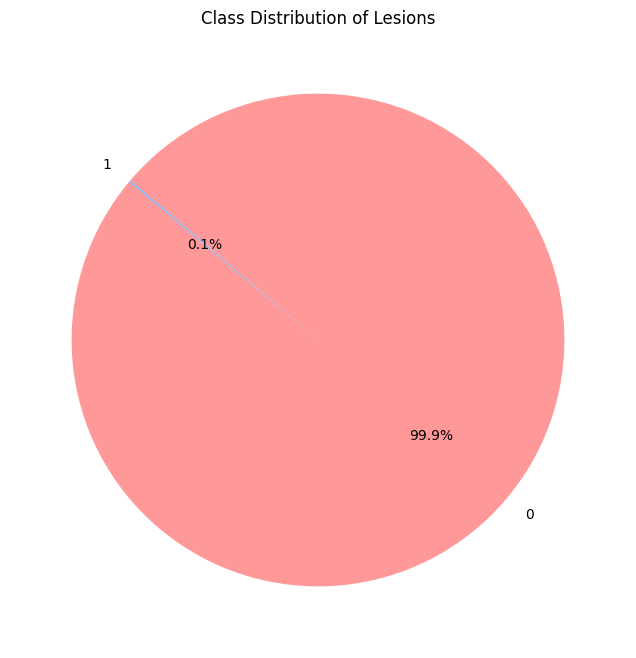

In [8]:
# Pie chart for class distribution
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Class Distribution of Lesions')
plt.show()

# DATA CLEANING

In [9]:
meta_data['sex'].replace(np.nan, 'Unknown', inplace=True)
meta_data[:5]

/tmp/ipykernel_24/3709496133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  meta_data['sex'].replace(np.nan, 'Unknown', inplace=True)


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [10]:
unknown_sex_rows = meta_data[meta_data['sex'] == 'Unknown']

print(unknown_sex_rows)

             isic_id  target  patient_id  age_approx      sex  \
57      ISIC_0073511       0  IP_3371534         NaN  Unknown   
60      ISIC_0073555       0  IP_3371534         NaN  Unknown   
63      ISIC_0073672       0  IP_6187331        55.0  Unknown   
72      ISIC_0073934       0  IP_9472195        55.0  Unknown   
132     ISIC_0076435       0  IP_2914511        30.0  Unknown   
...              ...     ...         ...         ...      ...   
400728  ISIC_9992252       0  IP_7703522        40.0  Unknown   
400826  ISIC_9994379       0  IP_1822913        35.0  Unknown   
400844  ISIC_9994715       0  IP_0473747        55.0  Unknown   
400983  ISIC_9998324       0  IP_1474479        70.0  Unknown   
401032  ISIC_9999386       0  IP_1474479        70.0  Unknown   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
57         lower extremity                    4.17  TBP tile: close-up   
60         posterior torso                    2.76  TBP tile: close-up 

In [11]:
meta_data['anatom_site_general'].replace(np.nan, 'Unknown', inplace=True)

unknown_site_rows = meta_data[meta_data['anatom_site_general'] == 'Unknown']
print(unknown_site_rows)

             isic_id  target  patient_id  age_approx     sex  \
73      ISIC_0073937       0  IP_1127121        65.0    male   
77      ISIC_0074075       0  IP_1127121        65.0    male   
136     ISIC_0076516       0  IP_1127121        65.0    male   
333     ISIC_0081327       0  IP_2988802        50.0  female   
399     ISIC_0083144       0  IP_1219465        85.0  female   
...              ...     ...         ...         ...     ...   
400784  ISIC_9993409       0  IP_9011000        50.0    male   
400787  ISIC_9993536       0  IP_1127121        65.0    male   
400829  ISIC_9994464       0  IP_1127121        65.0    male   
400974  ISIC_9997925       0  IP_4295424        50.0  female   
401036  ISIC_9999435       0  IP_3487012        75.0    male   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
73                 Unknown                    3.70  TBP tile: close-up   
77                 Unknown                    4.25  TBP tile: close-up   
136      

/tmp/ipykernel_24/511460414.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  meta_data['anatom_site_general'].replace(np.nan, 'Unknown', inplace=True)


In [12]:
mod_data = meta_data.drop(['lesion_id', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm'], axis = 1)

In [13]:
mod_data.isna()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,iddx_full,iddx_1,tbp_lv_dnn_lesion_confidence
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401056,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401057,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Summary of missing values per column
missing_summary = mod_data.isna().sum()
print("Summary of missing values per column:")
print(missing_summary)

Summary of missing values per column:
isic_id                            0
target                             0
patient_id                         0
age_approx                      2798
sex                                0
anatom_site_general                0
clin_size_long_diam_mm             0
image_type                         0
tbp_tile_type                      0
tbp_lv_A                           0
tbp_lv_Aext                        0
tbp_lv_B                           0
tbp_lv_Bext                        0
tbp_lv_C                           0
tbp_lv_Cext                        0
tbp_lv_H                           0
tbp_lv_Hext                        0
tbp_lv_L                           0
tbp_lv_Lext                        0
tbp_lv_areaMM2                     0
tbp_lv_area_perim_ratio            0
tbp_lv_color_std_mean              0
tbp_lv_deltaA                      0
tbp_lv_deltaB                      0
tbp_lv_deltaL                      0
tbp_lv_deltaLB                     0


In [15]:
mod_data = mod_data.dropna(subset=['age_approx'])

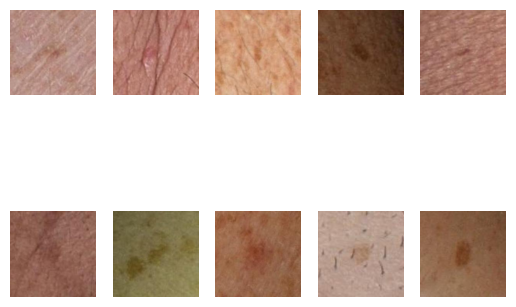

In [16]:
import albumentations as A

# Define the source and destination directories
source_dir = '/kaggle/input/skin-cancer-detection-dataset/train-image/image'
destination_dir = '/kaggle/working/processed_images'

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Get a list of all files in the source directory
all_files = os.listdir(source_dir)

# Sort the files to ensure we get the first 500
all_files.sort()

# Select the first 500 images from the list
selected_files = all_files[:1000]

# Define the augmentation pipeline
transform = A.Compose([
    A.RandomRotate90(p=0.5),
    A.Flip(p=0.5),
    A.Transpose(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.5, rotate_limit=45, p=0.2),
    A.HueSaturationValue(p=0.3),
])

# Resize and transfer the selected images to the destination directory
resize_size = (224, 224)

for file_name in selected_files:
    source_file = os.path.join(source_dir, file_name)
    destination_file = os.path.join(destination_dir, file_name)

    try:
        # Open the image
        with Image.open(source_file) as img:
            img = np.array(img)
            augmented = transform(image=img)
            augmented_img = augmented['image']
            resized_img = Image.fromarray(augmented_img).resize(resize_size)
            
            # Save the augmented and resized image to the destination directory
            resized_img.save(destination_file)

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# Display the augmented images
processed_images = [os.path.join(destination_dir, file) for file in selected_files]

# Display a few images using matplotlib
for i, img_path in enumerate(processed_images[:10]):  # Display first 10 images
    try:
        img = Image.open(img_path)
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(img)
        plt.axis('off')
    except Exception as e:
        print(f"Error displaying image {img_path}: {e}")

plt.show()


In [17]:
# Check and print the size of each resized image
for file_name in processed_images[:10]:
    resized_file = os.path.join(destination_dir, file_name)
    with Image.open(resized_file) as img:
        print(f"Image: {file_name}, Size: {img.size}")

Image: /kaggle/working/processed_images/ISIC_0015670.jpg, Size: (224, 224)
Image: /kaggle/working/processed_images/ISIC_0015845.jpg, Size: (224, 224)
Image: /kaggle/working/processed_images/ISIC_0015864.jpg, Size: (224, 224)
Image: /kaggle/working/processed_images/ISIC_0015902.jpg, Size: (224, 224)
Image: /kaggle/working/processed_images/ISIC_0024200.jpg, Size: (224, 224)
Image: /kaggle/working/processed_images/ISIC_0035502.jpg, Size: (224, 224)
Image: /kaggle/working/processed_images/ISIC_0051648.jpg, Size: (224, 224)
Image: /kaggle/working/processed_images/ISIC_0051665.jpg, Size: (224, 224)
Image: /kaggle/working/processed_images/ISIC_0051710.jpg, Size: (224, 224)
Image: /kaggle/working/processed_images/ISIC_0051758.jpg, Size: (224, 224)


# EMPTYING A DIRECTORY

In [18]:
# def empty_directory(directory_path):
#     # Check if the directory exists
#     if not os.path.exists(directory_path):
#         print(f"The directory {directory_path} does not exist.")
#         return

#     # Iterate over all the files and subdirectories in the specified directory
#     for item_name in os.listdir(directory_path):
#         item_path = os.path.join(directory_path, item_name)
        
#         if os.path.isfile(item_path) or os.path.islink(item_path):
#             # Remove files and symbolic links
#             os.remove(item_path)
#         elif os.path.isdir(item_path):
#             # Remove directories and their contents
#             shutil.rmtree(item_path)

#     print(f"The directory {directory_path} has been emptied.")

# # Specify the directory to be emptied
# directory_to_empty = '/kaggle/working/resized_images'  # Replace with your directory path

# # Empty the directory
# empty_directory(directory_to_empty)

# DELETING A DIRECTORY

In [19]:
# directory_to_delete = '/kaggle/working/resized_images'
# # Delete the directory and its contents
# shutil.rmtree(directory_to_delete)
# print(f"Directory '{directory_to_delete}' has been deleted.")

# SPLITTING DATA

In [20]:
from sklearn.model_selection import train_test_split

# Define the source and destination directories
source_dir = '/kaggle/input/skin-cancer-detection-dataset/train-image/image'
base_destination_dir = '/kaggle/working/processed_images'

# Ensure the destination directories exist
train_dir = os.path.join(base_destination_dir, 'train')
val_dir = os.path.join(base_destination_dir, 'val')
test_dir = os.path.join(base_destination_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get a list of all files in the source directory
all_files = os.listdir(source_dir)

# Sort the files to ensure we get the first 500
all_files.sort()

# Select the first 500 images from the list
selected_files = all_files[:1000]

# Split the data into train, validation, and test sets
train_files, test_files = train_test_split(selected_files, test_size=0.2, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


# USING PRE TRAINED MODELS

In [21]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image

# Step 2: Set up GPU configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

# Step 3: Import Libraries
# Initialize ResNet50 model without pre-trained weights
resnet_model = ResNet50(weights=None, include_top=False, pooling='avg')

# Load the manually downloaded weights
weights_path = '/kaggle/input/pre-trained-models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'  # Replace with the path to your weights file
resnet_model.load_weights(weights_path)

def extract_features(image_path, resnet_model):
    # Load and preprocess the image for ResNet50
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = resnet_preprocess_input(img_array)
    
    # Extract features using ResNet50
    resnet_features = resnet_model.predict(img_array)
    
    return resnet_features.flatten()  # Flatten the features if necessary

def extract_features_from_directory(source_dir, resnet_model, output_file):
    feature_list = []
    file_names = []

    for file_name in os.listdir(source_dir):
        image_path = os.path.join(source_dir, file_name)
        try:
            features = extract_features(image_path, resnet_model)
            feature_list.append(features)
            file_names.append(file_name)
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

    # Save features to a file
    np.savez(output_file, features=np.array(feature_list), file_names=file_names)

# Example usage
source_dir = '/kaggle/working/processed_images'  # Replace with your directory
extract_features_from_directory(source_dir, resnet_model, 'combined_features.npz')


2024-07-26 14:08:12.140256: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 14:08:12.140373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 14:08:12.260598: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


1 Physical GPUs, 1 Logical GPUs
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


I0000 00:00:1722002910.047843      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

# VERIFYING FEATURE EXTRACTION

In [22]:
# Load and check the saved features
npzfile = np.load('combined_features.npz')
features = npzfile['features']
file_names = npzfile['file_names']

print(f'Features shape: {features.shape}')
print(f'File names: {file_names}')

Features shape: (1000, 2048)
File names: ['ISIC_0090432.jpg' 'ISIC_0085800.jpg' 'ISIC_0081837.jpg'
 'ISIC_0052003.jpg' 'ISIC_0094955.jpg' 'ISIC_0096658.jpg'
 'ISIC_0078524.jpg' 'ISIC_0090959.jpg' 'ISIC_0074209.jpg'
 'ISIC_0087147.jpg' 'ISIC_0090492.jpg' 'ISIC_0077385.jpg'
 'ISIC_0088971.jpg' 'ISIC_0092163.jpg' 'ISIC_0081301.jpg'
 'ISIC_0094855.jpg' 'ISIC_0082895.jpg' 'ISIC_0088196.jpg'
 'ISIC_0078904.jpg' 'ISIC_0078548.jpg' 'ISIC_0076259.jpg'
 'ISIC_0073521.jpg' 'ISIC_0074666.jpg' 'ISIC_0094234.jpg'
 'ISIC_0085253.jpg' 'ISIC_0096843.jpg' 'ISIC_0083769.jpg'
 'ISIC_0088843.jpg' 'ISIC_0090968.jpg' 'ISIC_0081002.jpg'
 'ISIC_0092860.jpg' 'ISIC_0074437.jpg' 'ISIC_0088713.jpg'
 'ISIC_0076172.jpg' 'ISIC_0085280.jpg' 'ISIC_0083498.jpg'
 'ISIC_0081966.jpg' 'ISIC_0091265.jpg' 'ISIC_0085591.jpg'
 'ISIC_0090538.jpg' 'ISIC_0086314.jpg' 'ISIC_0090125.jpg'
 'ISIC_0052367.jpg' 'ISIC_0074366.jpg' 'ISIC_0078381.jpg'
 'ISIC_0093556.jpg' 'ISIC_0073975.jpg' 'ISIC_0095689.jpg'
 'ISIC_0093169.jpg' 'ISIC_00961

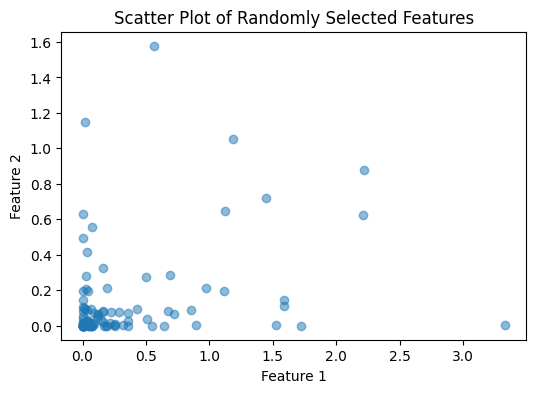

In [23]:
# Randomly select a subset of feature vectors to plot
num_samples = 100
indices = np.random.choice(len(features), num_samples, replace=False)

# Get the selected features
selected_features = features[indices]

# Plot the first two features (or any two features) for these samples
plt.figure(figsize=(6, 4))
plt.scatter(selected_features[:, 0], selected_features[:, 1], alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Randomly Selected Features')
plt.show()


# COLOR HISTOGRAM

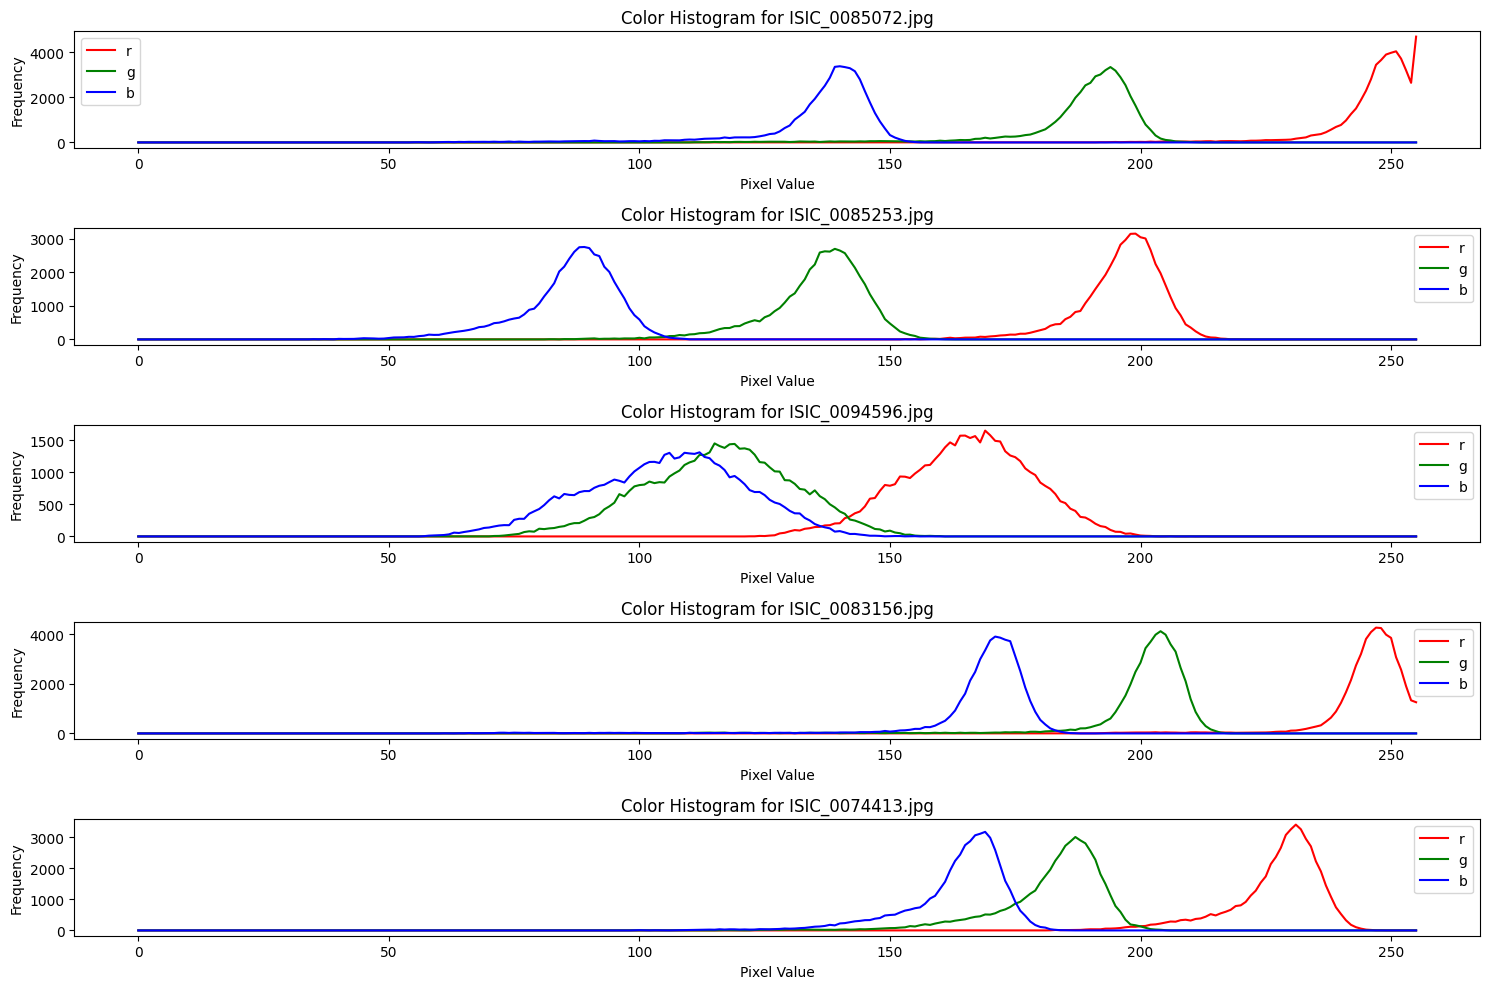

In [24]:
import cv2

# Path to the folder containing images
folder_path = '/kaggle/working/processed_images'

# List images in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
# Select a subset of images to plot
num_images_to_plot = 5
selected_images = np.random.choice(image_files, num_images_to_plot, replace=False)

# Create subplots
plt.figure(figsize=(15, 10))

for idx, image_file in enumerate(selected_images):
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)
    
    # Convert to RGB (OpenCV loads images in BGR format by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Compute histograms for each channel
    channels = ('r', 'g', 'b')
    plt.subplot(num_images_to_plot, 1, idx + 1)
    for i, channel in enumerate(channels):
        histogram = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
        plt.plot(histogram, color=channel, label=channel)
    
    plt.title(f'Color Histogram for {image_file}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


# DESCRIBING LOCAL TEXTURE USING LBP

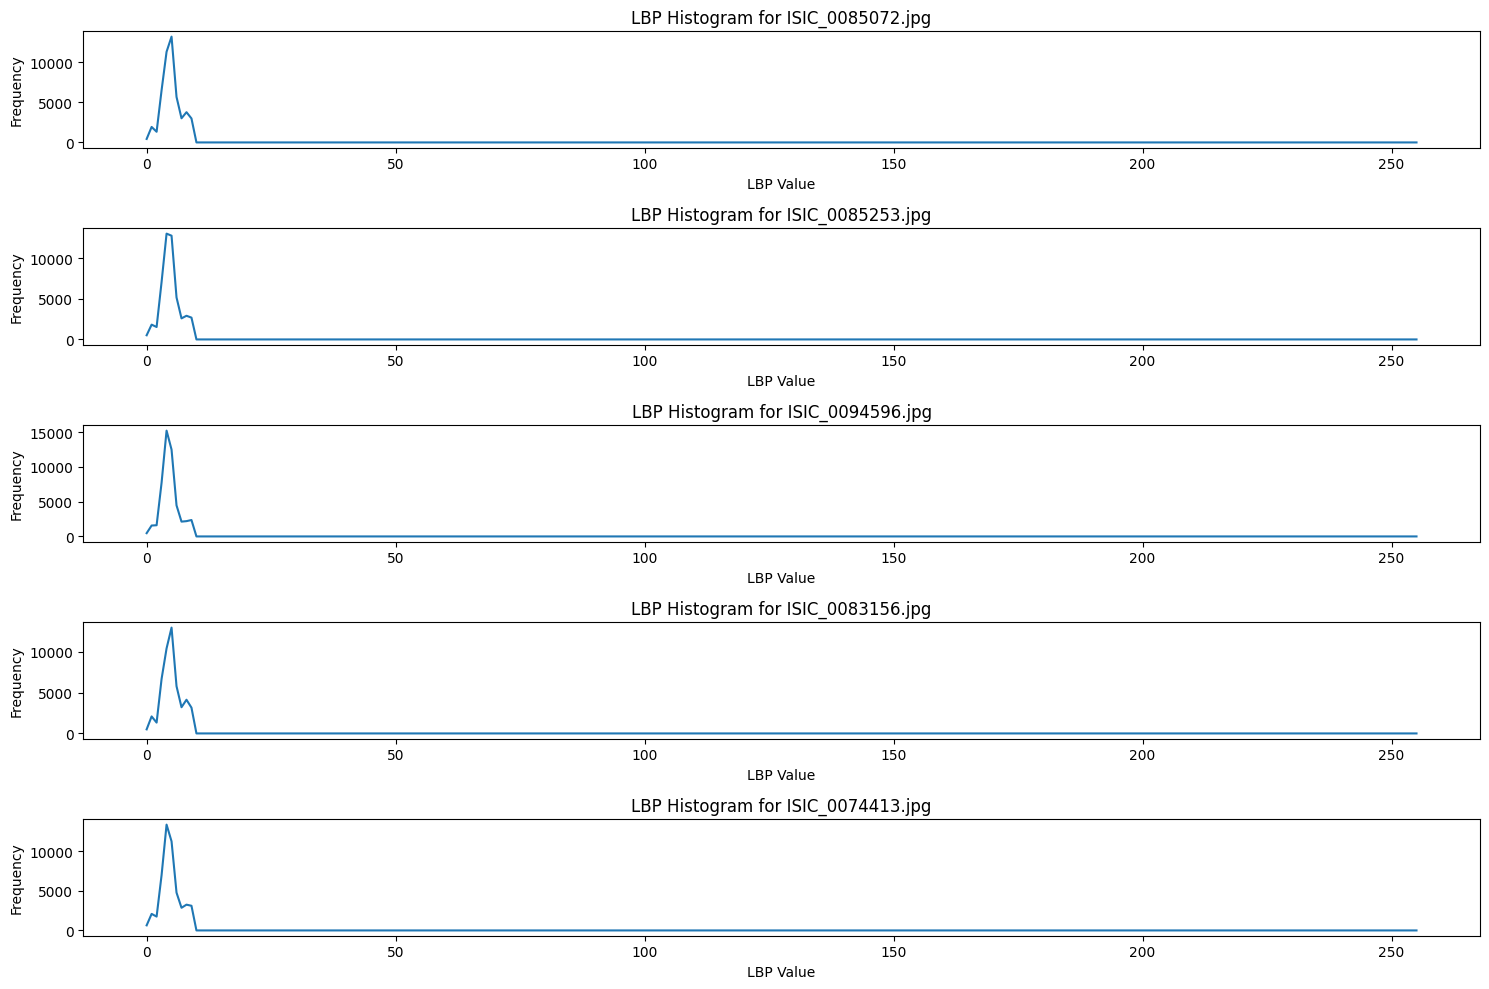

In [25]:
from skimage.feature import local_binary_pattern
from skimage import exposure

# Create subplots
plt.figure(figsize=(15, 10))

for idx, image_file in enumerate(selected_images):
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute LBP
    lbp = local_binary_pattern(gray_image, P=8, R=1, method='uniform')
    
    # Compute histogram of LBP
    lbp_hist, _ = np.histogram(lbp, bins=np.arange(0, 2**8 + 1), range=(0, 2**8))
    
    # Plot LBP histogram
    plt.subplot(num_images_to_plot, 1, idx + 1)
    plt.plot(lbp_hist, label='LBP Histogram')
    plt.title(f'LBP Histogram for {image_file}')
    plt.xlabel('LBP Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# CONTOUR BASED SHAPE DEPICTORS

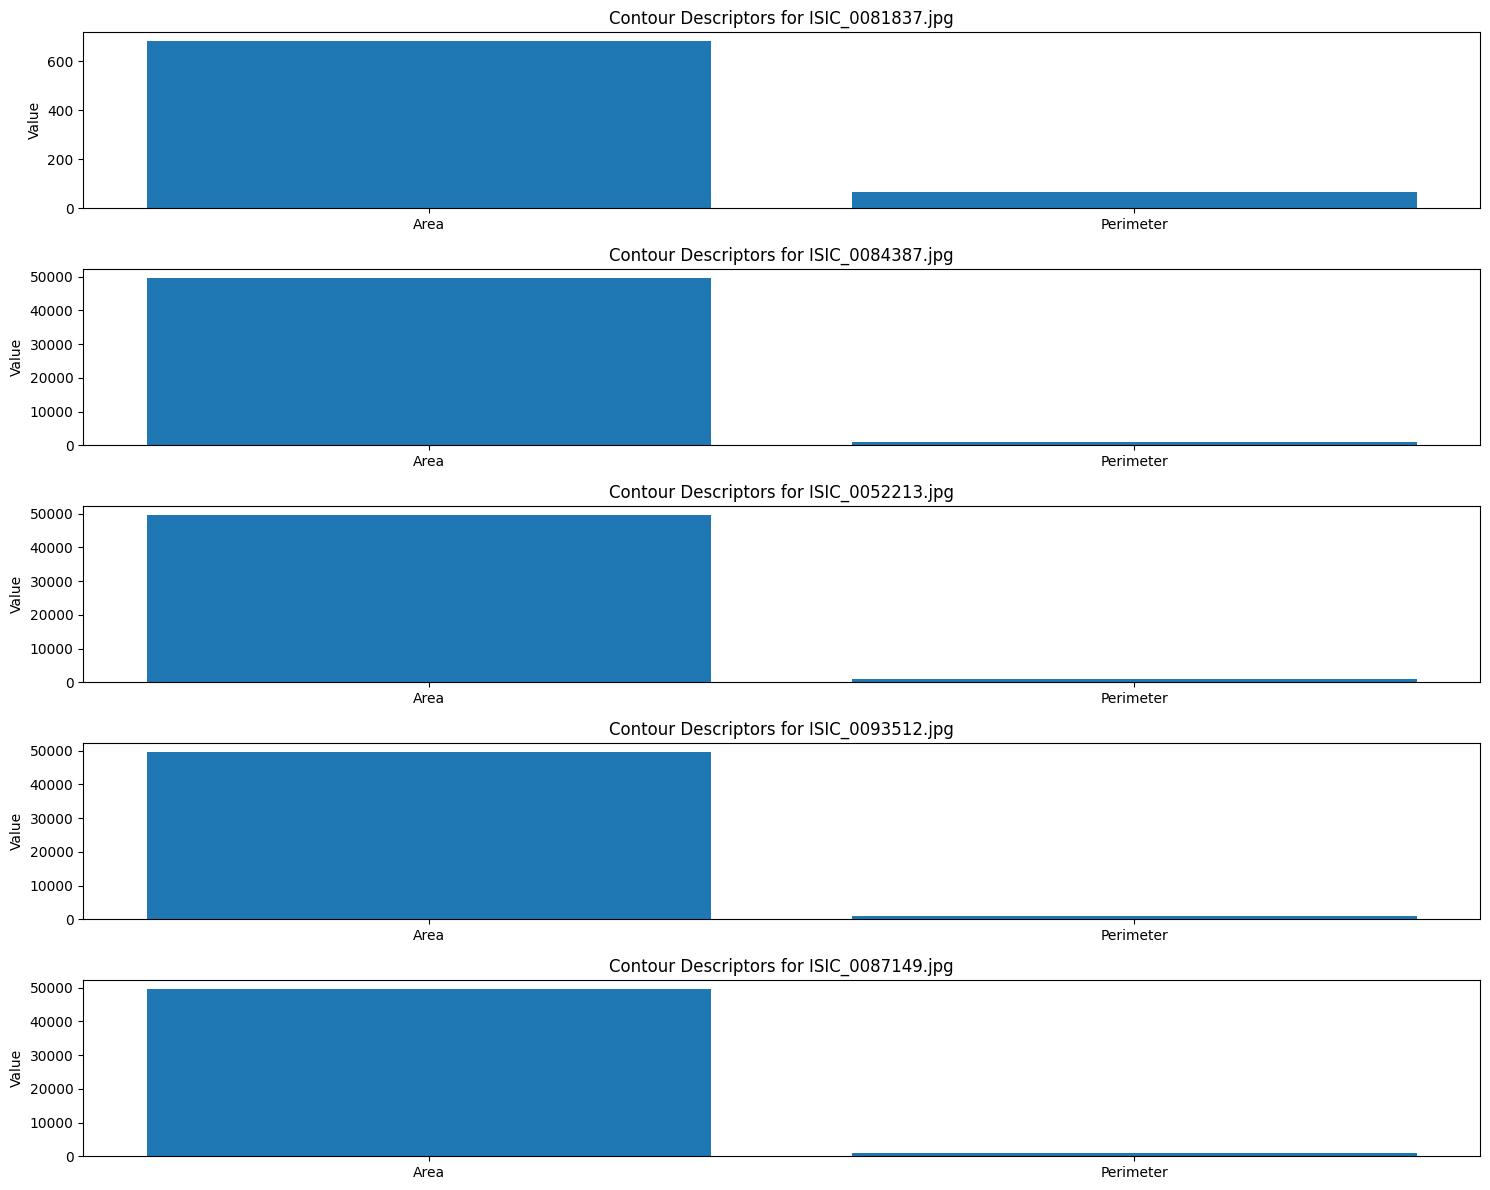

In [26]:
# Path to the folder containing images
folder_path = '/kaggle/working/processed_images'

# List images in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
# Select a subset of images to plot
num_images_to_plot = 5
selected_images = np.random.choice(image_files, num_images_to_plot, replace=False)

# Create subplots
plt.figure(figsize=(15, 12))

for idx, image_file in enumerate(selected_images):
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)
    
    # Convert to grayscale and binary
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    areas = []
    perimeters = []
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        areas.append(area)
        perimeters.append(perimeter)
    
    # Plot contour-based descriptors
    plt.subplot(num_images_to_plot, 1, idx + 1)
    plt.bar(['Area', 'Perimeter'], [np.mean(areas), np.mean(perimeters)])
    plt.title(f'Contour Descriptors for {image_file}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [27]:
print(mod_data.dtypes)

isic_id                          object
target                            int64
patient_id                       object
age_approx                      float64
sex                              object
anatom_site_general              object
clin_size_long_diam_mm          float64
image_type                       object
tbp_tile_type                    object
tbp_lv_A                        float64
tbp_lv_Aext                     float64
tbp_lv_B                        float64
tbp_lv_Bext                     float64
tbp_lv_C                        float64
tbp_lv_Cext                     float64
tbp_lv_H                        float64
tbp_lv_Hext                     float64
tbp_lv_L                        float64
tbp_lv_Lext                     float64
tbp_lv_areaMM2                  float64
tbp_lv_area_perim_ratio         float64
tbp_lv_color_std_mean           float64
tbp_lv_deltaA                   float64
tbp_lv_deltaB                   float64
tbp_lv_deltaL                   float64
